<a href="https://colab.research.google.com/github/MikickaMonika/projekty-grupowe/blob/main/projekt_grupowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import seaborn as sns
from IPython.display import display
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

SEED = 42

np.random.seed(SEED)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df = pd.read_csv('/content/target.csv')
df_1= pd.read_csv('/content/df_1.csv')
df_2 = pd.read_csv('/content/df_2.csv')
dfX = pd.read_csv('/content/X_test.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


# Nowa sekcja

In [ ]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Attrition
0,0,104,No
1,1,1638,No
2,2,164,No
3,3,395,No
4,4,53,No


In [ ]:
df_1.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,...,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,...,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,...,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,...,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,...,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
df_2.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0
1,1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0
2,2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0
3,3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0
4,4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0


In [ ]:
df_1.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,2252.292887,4809.243143,429.123199,800.843794,34478.313343,2.906788,1.0,2.719665,66.036495,2.741516,2.051604,2.722920,6453.266853,14266.381450,2.677359
std,1296.893070,2643.040205,1591.153416,405.655763,147682.315767,1.026460,0.0,1.092333,20.298352,0.711379,1.102569,1.106692,4672.993959,7154.584275,2.490632
min,0.000000,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1075.250000,1680.250000,31.000000,457.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,7910.250000,1.000000
50%,2297.500000,5828.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14174.000000,2.000000
75%,3372.750000,6903.750000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8307.750000,20471.000000,4.000000
max,4448.000000,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [ ]:
df.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber
count,4302.000000,4302.000000
mean,2252.292887,4809.243143
std,1296.893070,2643.040205
min,0.000000,1.000000
25%,1075.250000,1680.250000
50%,2297.500000,5828.500000
75%,3372.750000,6903.750000
max,4448.000000,7979.000000


In [ ]:
df_1.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,2252.292887,4809.243143,429.123199,800.843794,34478.313343,2.906788,1.0,2.719665,66.036495,2.741516,2.051604,2.722920,6453.266853,14266.381450,2.677359
std,1296.893070,2643.040205,1591.153416,405.655763,147682.315767,1.026460,0.0,1.092333,20.298352,0.711379,1.102569,1.106692,4672.993959,7154.584275,2.490632
min,0.000000,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1075.250000,1680.250000,31.000000,457.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,7910.250000,1.000000
50%,2297.500000,5828.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14174.000000,2.000000
75%,3372.750000,6903.750000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8307.750000,20471.000000,4.000000
max,4448.000000,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [ ]:
df1 = df_1.loc[(df_1["Age"] >=18) & (df_1["Age"] < 65)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df1.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,...,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,...,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,...,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,...,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,...,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
df1.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.0,4004.000000,4004.000000,4004.000000,4004.000000,4004.00000,4004.000000,4004.000000,4004.000000
mean,2193.267233,4677.723277,36.750999,797.504496,37043.647852,2.900599,1.0,2.723526,66.088911,2.740260,2.045205,2.71953,6428.128122,14307.163087,2.668831
std,1301.340589,2681.899494,9.094430,405.239933,152769.993183,1.028988,0.0,1.091257,20.199705,0.713502,1.098544,1.10616,4659.063173,7158.702052,2.495105
min,0.000000,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.00000,1009.000000,2094.000000,0.000000
25%,1000.750000,1572.750000,30.000000,451.000000,2.000000,2.000000,1.0,2.000000,49.000000,2.000000,1.000000,2.00000,2886.000000,7974.500000,1.000000
50%,2225.500000,5756.500000,35.000000,798.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.00000,4859.000000,14242.000000,2.000000
75%,3309.250000,6840.250000,42.000000,1157.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.00000,8237.000000,20489.000000,4.000000
max,4448.000000,7979.000000,60.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.00000,19999.000000,26999.000000,9.000000


In [ ]:
upper_limit = df1["DistanceFromHome"].quantile(0.95)
lower_limit = df1["DistanceFromHome"].quantile(0.05)
df1[(df1["DistanceFromHome"] < upper_limit) & (df_3["DistanceFromHome"] > lower_limit)]
df1.loc[(df1["DistanceFromHome"] > upper_limit), "DistanceFromHome"] = upper_limit
df1.loc[(df1["DistanceFromHome"] < lower_limit), "DistanceFromHome"] = lower_limit
df1 = df1[(df1['DistanceFromHome']<upper_limit) & (df1['DistanceFromHome']>lower_limit)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
upper_limit = df_2["YearlyIncome"].quantile(0.90)
lower_limit = df_2["YearlyIncome"].quantile(0.05)
df_2[(df_2["YearlyIncome"] < upper_limit) & (df_2["YearlyIncome"] > lower_limit)]
df_2.loc[(df_2["YearlyIncome"] > upper_limit), "YearlyIncome"] = upper_limit
df_2.loc[(df_2["YearlyIncome"] < lower_limit), "YearlyIncome"] = lower_limit
df_2 = df_2[(df_2['YearlyIncome']<upper_limit) & (df_2['YearlyIncome']>lower_limit)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
upper_limit = df_2["TotalWorkingYears"].quantile(0.90)
lower_limit = df_2["TotalWorkingYears"].quantile(0.05)
df_2[(df_2["TotalWorkingYears"] < upper_limit) & (df_2["TotalWorkingYears"] > lower_limit)]
df_2.loc[(df_2["TotalWorkingYears"] > upper_limit), "TotalWorkingYears"] = upper_limit
df_2.loc[(df_2["TotalWorkingYears"] < lower_limit), "TotalWorkingYears"] = lower_limit
df_2 = df_2[(df_2['TotalWorkingYears']<upper_limit) & (df_2['TotalWorkingYears']>lower_limit)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df1.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Unnamed: 0,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.0,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000
mean,2156.790862,4594.428396,36.721558,796.632628,4938.873965,2.888378,1.0,2.739957,66.055504,2.754676,2.052745,2.715118,6429.265563,14409.597363,2.715118
std,1311.594055,2708.596826,9.129860,410.158174,32927.630651,1.024152,0.0,1.081564,20.104504,0.697001,1.088271,1.099127,4612.716216,7198.879945,2.497382
min,1.000000,2.000000,18.000000,102.000000,2.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,948.000000,1497.000000,30.000000,447.000000,4.000000,2.000000,1.0,2.000000,49.000000,2.000000,1.000000,2.000000,2897.000000,8040.000000,1.000000
50%,2178.000000,5709.000000,35.000000,791.000000,9.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4907.000000,14363.000000,2.000000
75%,3274.000000,6805.000000,42.000000,1174.000000,17.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8396.000000,20750.000000,4.000000
max,4442.000000,7973.000000,60.000000,1499.000000,304698.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26999.000000,9.000000


In [ ]:
df.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Unnamed: 0         int64
EmployeeNumber     int64
Attrition         object
dtype: object

In [ ]:
df_1.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Unnamed: 0                   int64
EmployeeNumber               int64
Age                        float64
BusinessTravel              object
DailyRate                  float64
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount              float64
EnvironmentSatisfaction    float64
Gender                      object
HourlyRate                 float64
JobInvolvement             float64
JobLevel                   float64
JobRole                     object
JobSatisfaction            float64
MaritalStatus               object
MonthlyIncome              float64
MonthlyRate                float64
NumCompaniesWorked         float64
dtype: object

In [ ]:
df_1 = df_1.drop(["Unnamed: 0"], axis = 1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df4  = df_1.merge(df_2, on='EmployeeNumber', how='left').merge(df)
print(df4)

      EmployeeNumber     Age BusinessTravel  DailyRate  \
0                104    30.0  Travel_Rarely      852.0   
1               1638    38.0  Travel_Rarely      397.0   
2                164    26.0  Travel_Rarely      841.0   
3                395    28.0  Travel_Rarely     1117.0   
4                 53    35.0  Travel_Rarely      464.0   
...              ...     ...            ...        ...   
4297            7975  8823.0  Travel_Rarely      621.0   
4298            7976  8823.0  Travel_Rarely      621.0   
4299            7977    44.0     Non-Travel      381.0   
4300            7978    44.0     Non-Travel      381.0   
4301            7979    44.0     Non-Travel      381.0   

                  Department  DistanceFromHome  Education EducationField  \
0     Research & Development               1.0        1.0  Life Sciences   
1     Research & Development               2.0        2.0        Medical   
2     Research & Development               6.0        3.0          Other   

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df4.dropna()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4298,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4299,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes
4300,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes


In [ ]:
df4.isnull().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Unnamed: 0                  0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
upper_lim = df4['TotalWorkingYears'].quantile(.95) 
lower_lim = df4['TotalWorkingYears'].quantile(.05)
df4 = df4[(df4['TotalWorkingYears']<upper_lim) & (df4['TotalWorkingYears']>lower_lim)]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
upper_limit = df4["YearsInCurrentRole"].quantile(0.95)
lower_limit = df4["YearsInCurrentRole"].quantile(0.05)
df4[(df4["YearsInCurrentRole"] < upper_limit) & (df4["YearsInCurrentRole"] > lower_limit)]
df4.loc[(df4["YearsInCurrentRole"] > upper_limit), "YearsInCurrentRole"] = upper_limit
df4.loc[(df4["YearsInCurrentRole"] < lower_limit), "YearsInCurrentRole"] = lower_limit
df4 = df4[(df4['YearsInCurrentRole']<upper_limit) & (df4['YearsInCurrentRole']>lower_limit)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
upper_limit = df4["YearsWithCurrManager"].quantile(0.95)
lower_limit = df4["YearsWithCurrManager"].quantile(0.05)
df4[(df4["YearsWithCurrManager"] < upper_limit) & (df4["YearsWithCurrManager"] > lower_limit)]
df4.loc[(df4["YearsWithCurrManager"] > upper_limit), "YearsWithCurrManager"] = upper_limit
df4.loc[(df4["YearsWithCurrManager"] < lower_limit), "YearsWithCurrManager"] = lower_limit 
df4 = df4[(df4['YearsWithCurrManager']<upper_limit) & (df4['YearsWithCurrManager']>lower_limit)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
upper_limit = df4["YearsSinceLastPromotion"].quantile(0.95)
lower_limit = df4["YearsSinceLastPromotion"].quantile(0.05)
df4[(df4["YearsSinceLastPromotion"] < upper_limit) & (df4["YearsSinceLastPromotion"] > lower_limit)]
df4.loc[(df4["YearsSinceLastPromotion"] > upper_limit), "YearsSinceLastPromotion"] = upper_limit
df4.loc[(df4["YearsSinceLastPromotion"] < lower_limit), "YearsSinceLastPromotion"] = lower_limit
df4 = df4[(df4['YearsSinceLastPromotion']<upper_limit) & (df4['YearsSinceLastPromotion']>lower_limit)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df4.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.0,1952.000000,1952.000000,1952.000000,1952.000000,...,1952.0,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,4457.968238,503.004098,795.470287,47027.134734,2.909324,1.0,2.746926,64.961066,2.746414,2.232582,...,80.0,0.804816,30.735143,2.778176,2.772029,388.327357,60.608094,93.766906,50.134734,86767.911885
std,2743.064458,1697.403044,409.824668,171657.036291,1.052918,0.0,1.083160,20.207700,0.693188,1.171244,...,0.0,0.840003,177.542311,1.294421,0.693956,1508.970071,391.607250,507.246686,313.091961,60158.677253
min,2.000000,20.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,24084.000000
25%,1404.500000,32.000000,436.750000,2.000000,2.000000,1.0,2.000000,47.000000,2.000000,1.000000,...,80.0,0.000000,7.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,40419.000000
50%,5589.000000,38.000000,791.000000,8.000000,3.000000,1.0,3.000000,64.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,8.000000,6.000000,2.000000,6.000000,65640.000000
75%,6799.500000,47.000000,1157.000000,19.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,13.000000,8.000000,6.000000,8.000000,116856.000000
max,7979.000000,9890.000000,1498.000000,997422.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,2439.000000,6.000000,4.000000,9681.000000,3606.000000,4094.000000,2892.000000,239988.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df4["Attrition"] = df4["Attrition"].map({"No" : 0, "Yes" : 1})

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
for col in df4.columns:
  print(f"Feature name: {col}")
  print(df4[col].value_counts(), "\n")

Feature name: EmployeeNumber
164     1
6412    1
6410    1
6409    1
6408    1
       ..
1818    1
2013    1
1165    1
391     1
7979    1
Name: EmployeeNumber, Length: 1952, dtype: int64 

Feature name: Age
34.0      118
35.0       91
38.0       84
40.0       81
31.0       77
         ... 
2459.0      1
6025.0      1
3388.0      1
5257.0      1
6429.0      1
Name: Age, Length: 119, dtype: int64 

Feature name: BusinessTravel
Travel_Rarely        1359
Travel_Frequently     382
Non-Travel            211
Name: BusinessTravel, dtype: int64 

Feature name: DailyRate
330.0     10
444.0     10
408.0     10
201.0     10
933.0      9
          ..
1091.0     1
673.0      1
655.0      1
1321.0     1
841.0      1
Name: DailyRate, Length: 606, dtype: int64 

Feature name: Department
Research & Development    1294
Sales                      583
Human Resources             75
Name: Department, dtype: int64 

Feature name: DistanceFromHome
2.0         293
1.0         253
10.0         99
8.0          

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df4 = pd.get_dummies(df4)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
df4.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


EmployeeNumber                         int64
Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EmployeeCount                        float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
Unnamed: 0                             int64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StandardHours                        float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBa

In [ ]:
df4 = df4.drop("Unnamed: 0", axis = 1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
y = df4['Attrition']
X = df4.drop('Attrition', axis=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


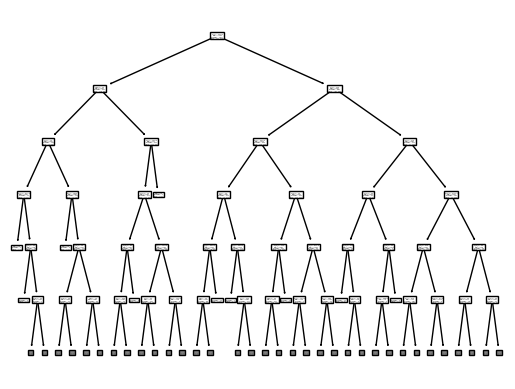

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plot_tree(dt, max_depth=5)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, random_state=123, shuffle=True)
model = tree.DecisionTreeRegressor(random_state=111, max_depth=5)
score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print('Cross Validation Score are {}'.format(-score))
print('Cross Validation Average Score is {}'.format(-score.mean()))

res=[]
for max_depth in range(1,10):
  kf = KFold(n_splits=10, random_state=123, shuffle=True)
  model = DecisionTreeRegressor(max_depth=max_depth)
  score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
  res.append(-score.mean())
  pd.concat([pd.Series(range(1,10)),pd.Series(res)],axis=1)
  

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Cross Validation Score are [0.3724093  0.3346662  0.36560291 0.36536161 0.32652242 0.375251
 0.37886727 0.40346186 0.32842415 0.36807015]
Cross Validation Average Score is 0.36186368639415967


In [ ]:
model = tree.DecisionTreeRegressor(random_state=111, max_depth=4)
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


DecisionTreeRegressor(max_depth=4, random_state=111)

In [ ]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.3463981520580847

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<Axes: >

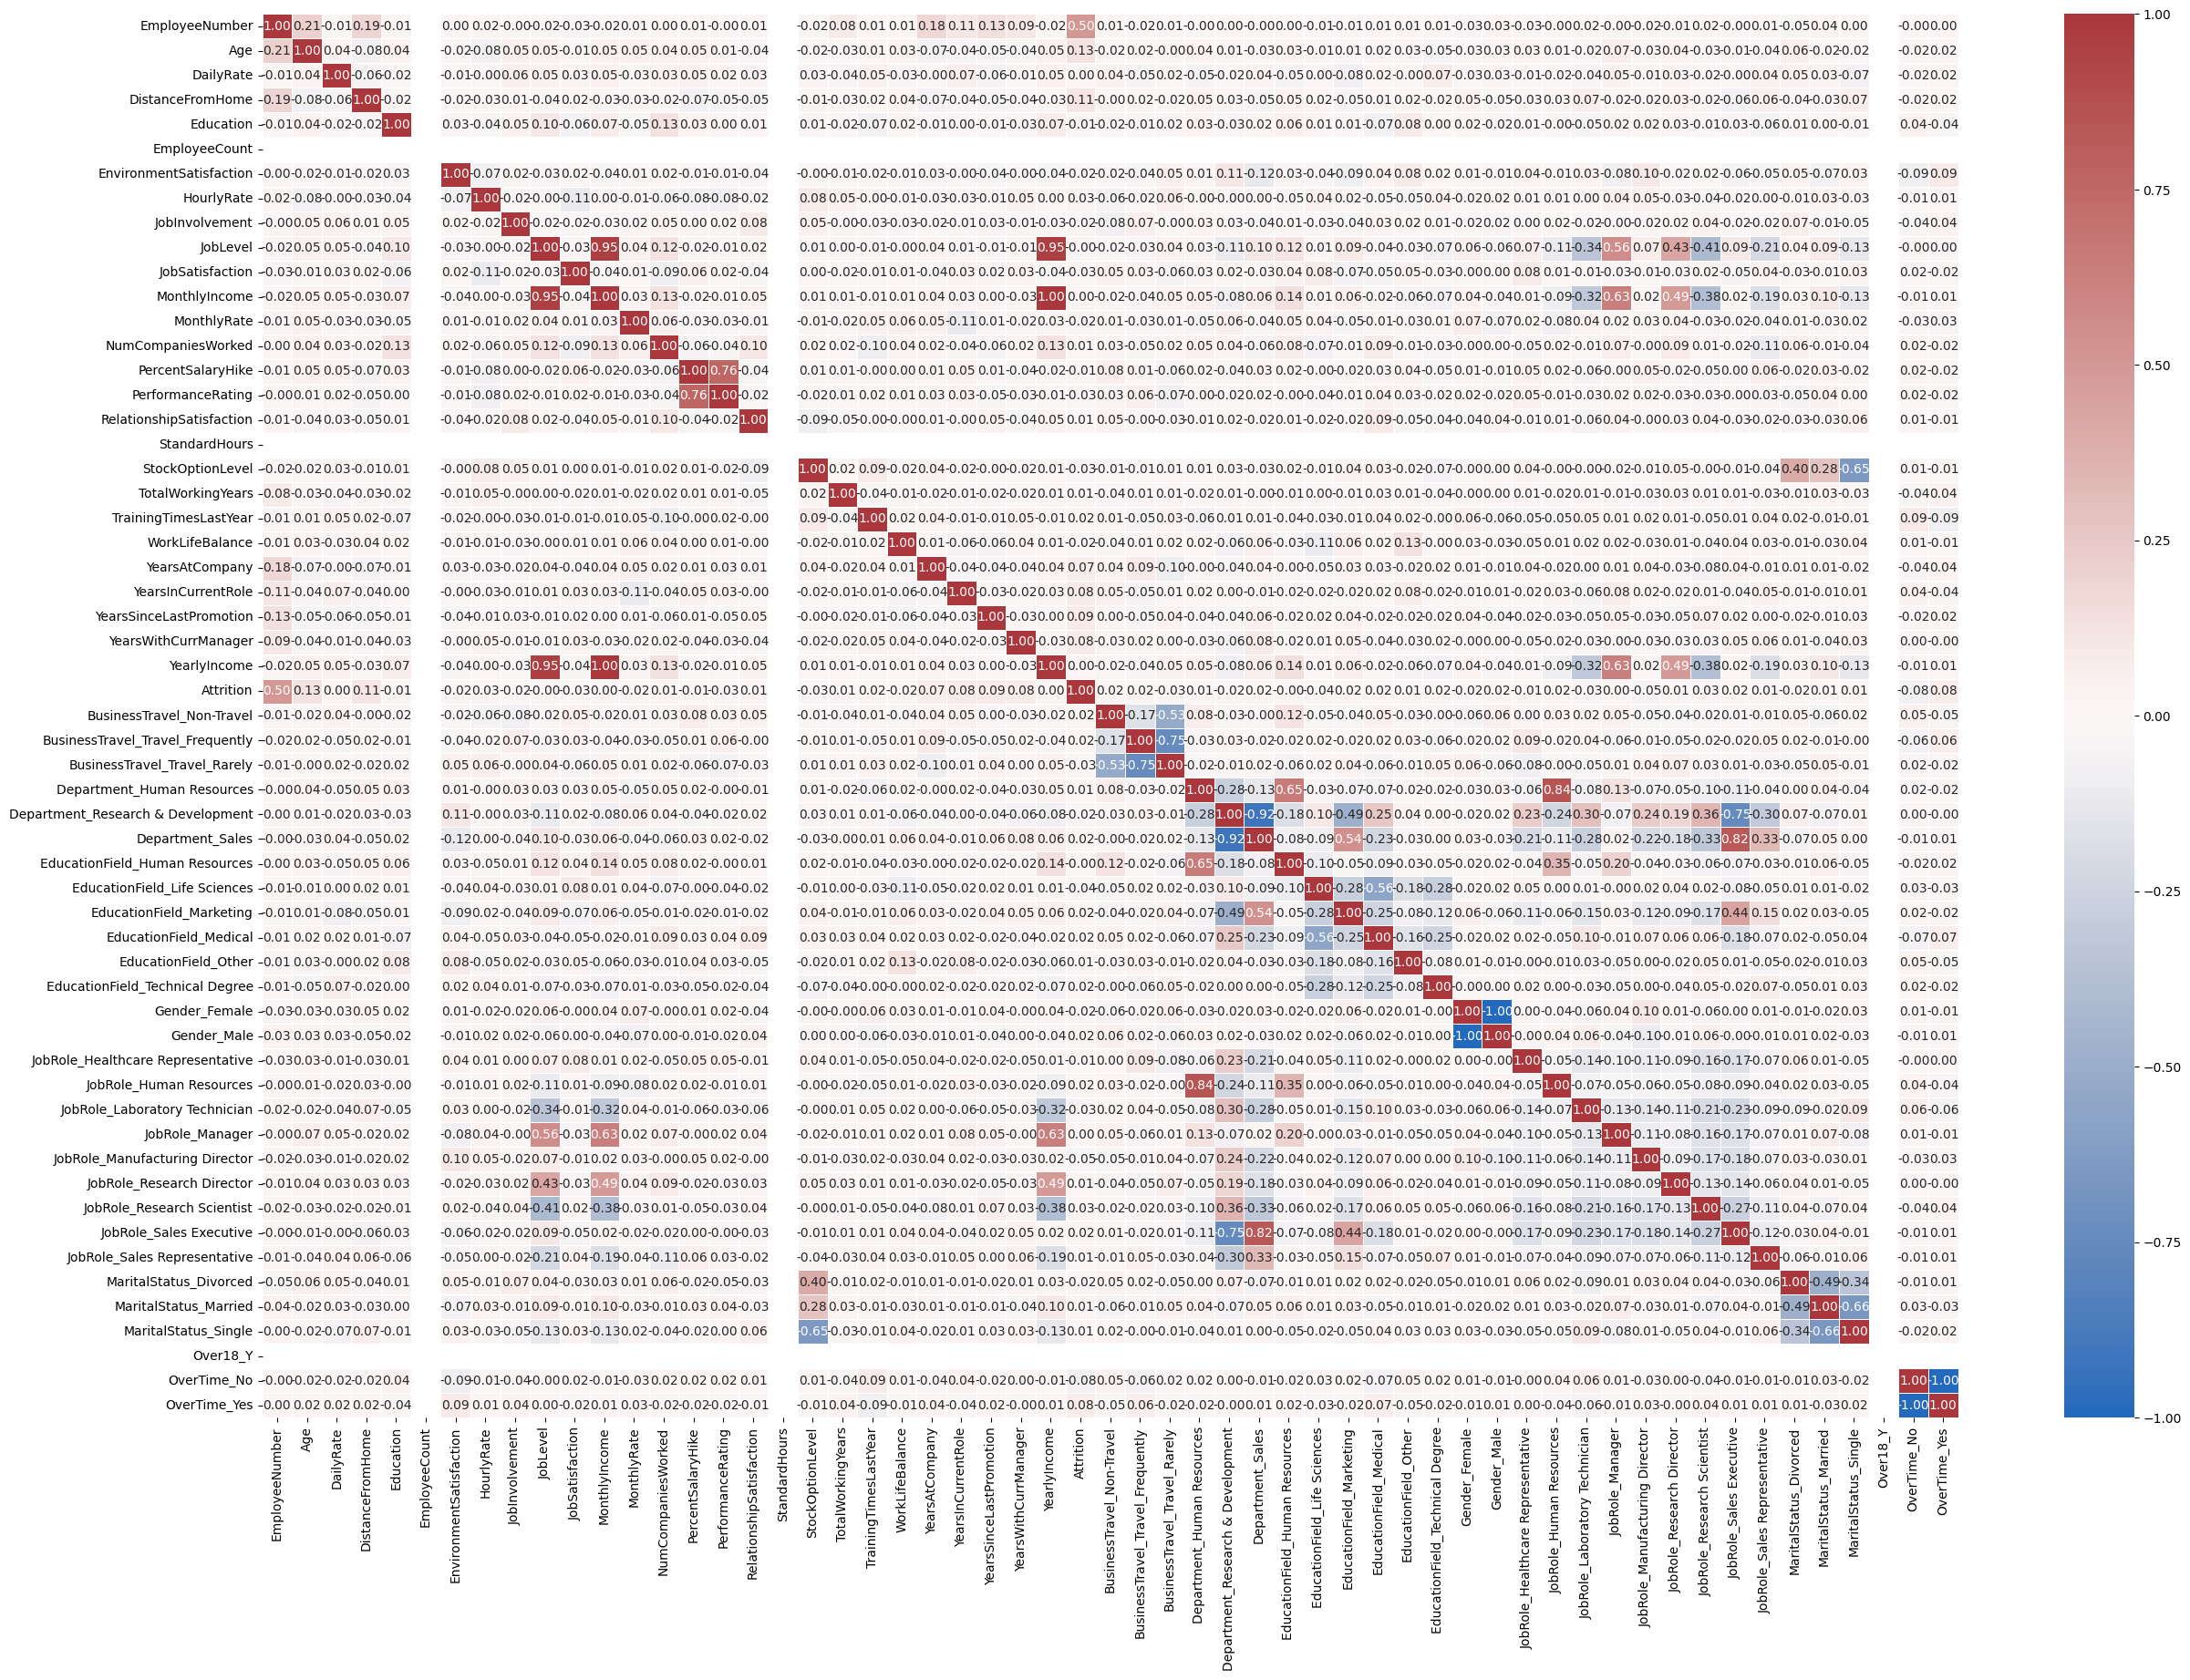

In [ ]:
plt.figure(figsize=(30,20));
sns.heatmap(df4.corr(),annot=True, fmt=".2f",linewidth=.5,cmap="vlag")

In [ ]:
from sklearn.linear_model import LogisticRegression




/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:

model = LogisticRegression(random_state = SEED, max_iter = 100)
model.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=42)

In [ ]:
tsh = 0.5


y_pred_scores = model.predict_proba(X_test)

y_pred = np.where(y_pred_scores[:, 1] > tsh, 1, 0)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def calculate_metrics(y_test, y_pred):
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_score_test = f1_score(y_test, y_pred)


    print(f"Accuracy: {accuracy_test:0.4f}")
    print(f"Precision: {precision_test:0.4f}")
    print(f"Recall: {recall_test:0.4f}")
    print(f"F1-score: {f1_score_test:0.4f}")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
calculate_metrics(y_test, y_pred)

Accuracy: 0.7235
Precision: 0.6698
Recall: 0.7934
F1-score: 0.7264


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('always')
print(classification_report(y_train, y_pred_train, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       717
           1     1.0000    1.0000    1.0000       649

    accuracy                         1.0000      1366
   macro avg     1.0000    1.0000    1.0000      1366
weighted avg     1.0000    1.0000    1.0000      1366



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#new_df = df4['EmployeeNumber'].copy()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:

y_test['preds'] = y_pred

df_out = pd.merge(df,y_test[['preds']],how = 'left')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


TypeError: ignored

In [ ]:
pd.DataFrame({"EmployeeNumber": X_test["EmployeeNumber"], "prediction" : y_pred})

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,EmployeeNumber,prediction
3462,7140,1
2960,6638,1
4201,7879,1
3390,7068,1
534,1109,0
...,...,...
3850,7528,1
3301,6979,1
4251,7929,1
2461,6139,1


In [ ]:
dfX = pd.read_csv('/content/X_test.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
dfX = pd.get_dummies(dfX)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
y_pred = model.predict(dfX)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
pd.DataFrame({"EmployeeNumber": dfX["EmployeeNumber"], "prediction" : y_pred}).to_csv("predykcje.csv")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
